In [19]:
!pip install tensorflow

    100% |████████████████████████████████| 73.6MB 440kB/s eta 0:00:01    37% |████████████                    | 27.8MB 26.9MB/s eta 0:00:02MB/s eta 0:00:01
    100% |████████████████████████████████| 2.0MB 9.6MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 12.0MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 8.1MB/s eta 0:00:01
    100% |████████████████████████████████| 3.2MB 7.1MB/s eta 0:00:01
    100% |████████████████████████████████| 1.3MB 13.5MB/s ta 0:00:01
    100% |████████████████████████████████| 102kB 14.7MB/s a 0:00:01
    100% |████████████████████████████████| 368kB 19.8MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 14.1MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 8.8MB/s eta 0:00:01
    100% |████████████████████████████████| 112kB 10.9MB/s ta 0:00:01
  Running setup.py bdist_wheel for gast ... done
  Stored in directory: /Users/shinhe/Library/Caches/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a

인공 신경망에서 1차 함수라 가정 - a,b값을  정하는데 편하게 쓰기위해 matrix 사용 
행렬의 곱에서 중간 값을 구하는 것이다. 백터 * 행렬 = 백터 /////
백터 * 행렬 * 백터 * 행렬 = 백터 - 이런식의 구성을 자세하게 보는 것도 가능 
ex) 입력은 음성 - 출력은 text - 음성인식 // 바둑 - 입력 - 지금 현재의 바둑 상황 출력 - 어 디에 둘까가 출력  
행렬 자체가 인공신경망이다 
  

# import modules

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

중요 모듈 3개  /// numpy는 행렬 

# data preparation and visualization

플롯이 가능한 경우는 x와 y의 개수가 맞을 때이다 2 * 3 이럴 때에는 되지 아니한다. 

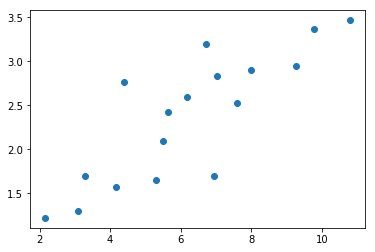

In [9]:
data = pd.read_csv('regression.csv')
X = data['X']
Y = data['Y']
plt.plot(X,Y,'o')

그렇다면 선 즉 y = ax+b를 구한다는 것은 무엇인가? 저것들을 지나치는 선 하나를 만드는 것이다. 가장 쉬운 형태로 만들기 위해서 한차원 더 높아진 경우
x하나 y하나의 경우는 2차로 하나의 선(무한대로 나아가는) /  x가 두개 y가 하나 이러한 3차의 경우 3차원상의 클라우드로 존재한다. - a,b,c값이 구해진다고 할 때 그것은 무엇일까?
y = ax1+bx2+c - (무한대로 나아가는) 평면을 만드는 것이다. 2차원에 있는 데이터를 설명해주는 모델은 1차원 / 3차원 상에서의 데이터를 설명해주는 것은
2차원 / 한차원씩 낮추어서 해당 패턴을 알아내다. 
입력 3개 y는 1개 - 4차원상 설명 모델은 3차이겠으나 직접적으로 이를 구하는 것은 상당히 힘이 든다. 입력하나 출력하나의 경우  입력 두개 출력 1개 
의 경우만 우리가 생각할 수 있다. 그것을 visualize하고 확장하는 것 / a구하고있구나 b구하고 있구나 이를 구하는 것이다 
이런식의 프로세스가 머신프로세스임

# create model

시퀀스는 모델의 모양을 정해주는 것이다. sequential한 모양을 만들어줌. 
add내용은 1은 y의 개수 input shape는 x의 개수이다. 둘다 각 열마다 x,y하나씩 있었다는 것을 기억!! 
이를 통해 y =ax+b 형태를 만들어 내는 것이다. a,b의 값을 뽑아내는 것임. 
위의 모델은 아직 형태만 만든것이지 무엇을 한 것은 없다. loss를 통해 오류값등을 보존 해주는 것

In [10]:
model = Sequential() # start of model 
model.add(Dense(1, input_shape = [1])) # now definition of model 
model.compile(optimizer = "sgd", loss = "mse")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


덴스는 입력이 몇개인가 출력이 몇개인가 이런것들을 정해주는 것이다. dense(1)- 출력이 하나 input shape - 입력이 두개이다
csv입력이 두개였다면 input shape 2 / 결과 값이 두개였다면 dense(2) 
dense는 입력값과 출력값이 fully connected(dense) 되게 보임. 모델을 볼 때 몇개 빼자고 할 수 있음- 이는 뒷부분에서 커버.
model.add(Dense(1, input_shape = [1])) - 이것이 y = ax+b -를 만들어줌
compile이라는 것은 저번시간에 내부적으로 parameter 
차이 만큼을 반영해주는것이다. a,b 값을 훈련을 통해 들어간 입력 값 x와 실제 y값(타겟)이 예상값 y와 안넣으면 달라질 수 없기 때문
이러한 차이를 반영 시켜주려는 것을 미분을 이용하는데 - 미분에 알고리즘 - 어드벤드스 - sgd - greediandistance/ 
mse는 loss는 정답과 예측값의 차이를 단순히 반영을 하는 것이 아닌  square을 하고 mean값을 이용하는 방식인거임. 이렇게 두개임
이 두가지를 정의해준 것이다. 

훈련 시키기 

# train model

아까 그 데이터를 가지고 estimate하는 것이다 

In [12]:
model.fit(X,Y, epochs = 1000)

Epoch 1/1000
17/17 [==============================] - 0s 138us/sample - loss: 1.3299
Epoch 2/1000
17/17 [==============================] - 0s 120us/sample - loss: 0.2043
Epoch 3/1000
17/17 [==============================] - 0s 136us/sample - loss: 0.1936
Epoch 4/1000
17/17 [==============================] - 0s 212us/sample - loss: 0.1933
Epoch 5/1000
17/17 [==============================] - 0s 121us/sample - loss: 0.1931
Epoch 6/1000
17/17 [==============================] - 0s 166us/sample - loss: 0.1929
Epoch 7/1000
17/17 [==============================] - 0s 277us/sample - loss: 0.1927
Epoch 8/1000
17/17 [==============================] - 0s 165us/sample - loss: 0.1925
Epoch 9/1000
17/17 [==============================] - 0s 125us/sample - loss: 0.1923
Epoch 10/1000
17/17 [==============================] - 0s 203us/sample - loss: 0.1922
Epoch 11/1000
17/17 [==============================] - 0s 156us/sample - loss: 0.1920
Epoch 12/1000
17/17 [==============================] - 0s 220us

Epoch 97/1000
17/17 [==============================] - 0s 232us/sample - loss: 0.1790
Epoch 98/1000
17/17 [==============================] - 0s 174us/sample - loss: 0.1788
Epoch 99/1000
17/17 [==============================] - 0s 108us/sample - loss: 0.1787
Epoch 100/1000
17/17 [==============================] - 0s 162us/sample - loss: 0.1786
Epoch 101/1000
17/17 [==============================] - 0s 190us/sample - loss: 0.1785
Epoch 102/1000
17/17 [==============================] - 0s 226us/sample - loss: 0.1783
Epoch 103/1000
17/17 [==============================] - 0s 195us/sample - loss: 0.1782
Epoch 104/1000
17/17 [==============================] - 0s 142us/sample - loss: 0.1781
Epoch 105/1000
17/17 [==============================] - 0s 103us/sample - loss: 0.1780
Epoch 106/1000
17/17 [==============================] - 0s 322us/sample - loss: 0.1779
Epoch 107/1000
17/17 [==============================] - 0s 222us/sample - loss: 0.1778
Epoch 108/1000
17/17 [========================

Epoch 192/1000
17/17 [==============================] - 0s 212us/sample - loss: 0.1697
Epoch 193/1000
17/17 [==============================] - 0s 113us/sample - loss: 0.1696
Epoch 194/1000
17/17 [==============================] - 0s 177us/sample - loss: 0.1695
Epoch 195/1000
17/17 [==============================] - 0s 109us/sample - loss: 0.1694
Epoch 196/1000
17/17 [==============================] - 0s 87us/sample - loss: 0.1694
Epoch 197/1000
17/17 [==============================] - 0s 144us/sample - loss: 0.1693
Epoch 198/1000
17/17 [==============================] - 0s 92us/sample - loss: 0.1692
Epoch 199/1000
17/17 [==============================] - 0s 97us/sample - loss: 0.1691
Epoch 200/1000
17/17 [==============================] - 0s 113us/sample - loss: 0.1691
Epoch 201/1000
17/17 [==============================] - 0s 192us/sample - loss: 0.1690
Epoch 202/1000
17/17 [==============================] - 0s 124us/sample - loss: 0.1689
Epoch 203/1000
17/17 [========================

Epoch 287/1000
17/17 [==============================] - 0s 116us/sample - loss: 0.1638
Epoch 288/1000
17/17 [==============================] - 0s 91us/sample - loss: 0.1638
Epoch 289/1000
17/17 [==============================] - 0s 130us/sample - loss: 0.1637
Epoch 290/1000
17/17 [==============================] - 0s 90us/sample - loss: 0.1637
Epoch 291/1000
17/17 [==============================] - 0s 144us/sample - loss: 0.1636
Epoch 292/1000
17/17 [==============================] - 0s 98us/sample - loss: 0.1636
Epoch 293/1000
17/17 [==============================] - 0s 83us/sample - loss: 0.1635
Epoch 294/1000
17/17 [==============================] - 0s 129us/sample - loss: 0.1635
Epoch 295/1000
17/17 [==============================] - 0s 104us/sample - loss: 0.1634
Epoch 296/1000
17/17 [==============================] - 0s 186us/sample - loss: 0.1634
Epoch 297/1000
17/17 [==============================] - 0s 241us/sample - loss: 0.1633
Epoch 298/1000
17/17 [=========================

Epoch 382/1000
17/17 [==============================] - 0s 118us/sample - loss: 0.1601
Epoch 383/1000
17/17 [==============================] - 0s 221us/sample - loss: 0.1601
Epoch 384/1000
17/17 [==============================] - 0s 93us/sample - loss: 0.1601
Epoch 385/1000
17/17 [==============================] - 0s 134us/sample - loss: 0.1600
Epoch 386/1000
17/17 [==============================] - 0s 173us/sample - loss: 0.1600
Epoch 387/1000
17/17 [==============================] - 0s 96us/sample - loss: 0.1600
Epoch 388/1000
17/17 [==============================] - 0s 215us/sample - loss: 0.1600
Epoch 389/1000
17/17 [==============================] - 0s 250us/sample - loss: 0.1599
Epoch 390/1000
17/17 [==============================] - 0s 120us/sample - loss: 0.1599
Epoch 391/1000
17/17 [==============================] - 0s 125us/sample - loss: 0.1599
Epoch 392/1000
17/17 [==============================] - 0s 130us/sample - loss: 0.1598
Epoch 393/1000
17/17 [=======================

Epoch 477/1000
17/17 [==============================] - 0s 262us/sample - loss: 0.1578
Epoch 478/1000
17/17 [==============================] - 0s 145us/sample - loss: 0.1578
Epoch 479/1000
17/17 [==============================] - 0s 400us/sample - loss: 0.1578
Epoch 480/1000
17/17 [==============================] - 0s 116us/sample - loss: 0.1578
Epoch 481/1000
17/17 [==============================] - 0s 171us/sample - loss: 0.1577
Epoch 482/1000
17/17 [==============================] - 0s 110us/sample - loss: 0.1577
Epoch 483/1000
17/17 [==============================] - 0s 125us/sample - loss: 0.1577
Epoch 484/1000
17/17 [==============================] - 0s 173us/sample - loss: 0.1577
Epoch 485/1000
17/17 [==============================] - 0s 154us/sample - loss: 0.1577
Epoch 486/1000
17/17 [==============================] - 0s 132us/sample - loss: 0.1576
Epoch 487/1000
17/17 [==============================] - 0s 168us/sample - loss: 0.1576
Epoch 488/1000
17/17 [=====================

Epoch 572/1000
17/17 [==============================] - 0s 271us/sample - loss: 0.1564
Epoch 573/1000
17/17 [==============================] - 0s 114us/sample - loss: 0.1563
Epoch 574/1000
17/17 [==============================] - 0s 86us/sample - loss: 0.1563
Epoch 575/1000
17/17 [==============================] - 0s 116us/sample - loss: 0.1563
Epoch 576/1000
17/17 [==============================] - 0s 107us/sample - loss: 0.1563
Epoch 577/1000
17/17 [==============================] - 0s 85us/sample - loss: 0.1563
Epoch 578/1000
17/17 [==============================] - 0s 130us/sample - loss: 0.1563
Epoch 579/1000
17/17 [==============================] - 0s 122us/sample - loss: 0.1563
Epoch 580/1000
17/17 [==============================] - 0s 93us/sample - loss: 0.1563
Epoch 581/1000
17/17 [==============================] - 0s 156us/sample - loss: 0.1562
Epoch 582/1000
17/17 [==============================] - 0s 210us/sample - loss: 0.1562
Epoch 583/1000
17/17 [========================

Epoch 667/1000
17/17 [==============================] - 0s 96us/sample - loss: 0.1554
Epoch 668/1000
17/17 [==============================] - 0s 112us/sample - loss: 0.1554
Epoch 669/1000
17/17 [==============================] - 0s 151us/sample - loss: 0.1554
Epoch 670/1000
17/17 [==============================] - 0s 103us/sample - loss: 0.1554
Epoch 671/1000
17/17 [==============================] - 0s 117us/sample - loss: 0.1554
Epoch 672/1000
17/17 [==============================] - 0s 88us/sample - loss: 0.1554
Epoch 673/1000
17/17 [==============================] - 0s 88us/sample - loss: 0.1554
Epoch 674/1000
17/17 [==============================] - 0s 129us/sample - loss: 0.1554
Epoch 675/1000
17/17 [==============================] - 0s 160us/sample - loss: 0.1554
Epoch 676/1000
17/17 [==============================] - 0s 78us/sample - loss: 0.1554
Epoch 677/1000
17/17 [==============================] - 0s 180us/sample - loss: 0.1554
Epoch 678/1000
17/17 [=========================

Epoch 762/1000
17/17 [==============================] - 0s 145us/sample - loss: 0.1548
Epoch 763/1000
17/17 [==============================] - 0s 138us/sample - loss: 0.1548
Epoch 764/1000
17/17 [==============================] - 0s 135us/sample - loss: 0.1548
Epoch 765/1000
17/17 [==============================] - 0s 144us/sample - loss: 0.1548
Epoch 766/1000
17/17 [==============================] - 0s 158us/sample - loss: 0.1548
Epoch 767/1000
17/17 [==============================] - 0s 338us/sample - loss: 0.1548
Epoch 768/1000
17/17 [==============================] - 0s 277us/sample - loss: 0.1548
Epoch 769/1000
17/17 [==============================] - 0s 164us/sample - loss: 0.1548
Epoch 770/1000
17/17 [==============================] - 0s 199us/sample - loss: 0.1548
Epoch 771/1000
17/17 [==============================] - 0s 165us/sample - loss: 0.1548
Epoch 772/1000
17/17 [==============================] - 0s 139us/sample - loss: 0.1548
Epoch 773/1000
17/17 [=====================

Epoch 857/1000
17/17 [==============================] - 0s 84us/sample - loss: 0.1545
Epoch 858/1000
17/17 [==============================] - 0s 129us/sample - loss: 0.1545
Epoch 859/1000
17/17 [==============================] - 0s 107us/sample - loss: 0.1545
Epoch 860/1000
17/17 [==============================] - 0s 109us/sample - loss: 0.1545
Epoch 861/1000
17/17 [==============================] - 0s 106us/sample - loss: 0.1545
Epoch 862/1000
17/17 [==============================] - 0s 148us/sample - loss: 0.1545
Epoch 863/1000
17/17 [==============================] - 0s 272us/sample - loss: 0.1545
Epoch 864/1000
17/17 [==============================] - 0s 294us/sample - loss: 0.1545
Epoch 865/1000
17/17 [==============================] - 0s 84us/sample - loss: 0.1545
Epoch 866/1000
17/17 [==============================] - 0s 150us/sample - loss: 0.1545
Epoch 867/1000
17/17 [==============================] - 0s 200us/sample - loss: 0.1545
Epoch 868/1000
17/17 [=======================

Epoch 952/1000
17/17 [==============================] - 0s 73us/sample - loss: 0.1543
Epoch 953/1000
17/17 [==============================] - 0s 97us/sample - loss: 0.1542
Epoch 954/1000
17/17 [==============================] - 0s 78us/sample - loss: 0.1542
Epoch 955/1000
17/17 [==============================] - 0s 92us/sample - loss: 0.1542
Epoch 956/1000
17/17 [==============================] - 0s 94us/sample - loss: 0.1542
Epoch 957/1000
17/17 [==============================] - 0s 79us/sample - loss: 0.1542
Epoch 958/1000
17/17 [==============================] - 0s 86us/sample - loss: 0.1542
Epoch 959/1000
17/17 [==============================] - 0s 95us/sample - loss: 0.1542
Epoch 960/1000
17/17 [==============================] - 0s 293us/sample - loss: 0.1542
Epoch 961/1000
17/17 [==============================] - 0s 132us/sample - loss: 0.1542
Epoch 962/1000
17/17 [==============================] - 0s 163us/sample - loss: 0.1542
Epoch 963/1000
17/17 [=============================

park를 여러개 하자 epochs를 통해 회전수를 늘리는 것 

처음 lost는 엄청나게 큰 차이가 났지만 하면 할수록 loss가 작아지는 방식으로 훈련이 진행되고 있다. 완벽에 가깝게 수렴해 가고 있다.

시스템을 만들고 출력값을 넣어보는 것

# model prediction

model predict는 a,b를 estimate를 통해 구함. 모델이 정해짐. x값을 넣으면 y값이 이것이 나오겠다 예측하는 것
x에 아무 숫자 줘도 되는데 저 안의 실제 입력 출력 기부 값과 일치함을 확인해보기 위해 1~10을 적었다

[[1.0074699]
 [1.2661605]
 [1.5248512]
 [1.7835419]
 [2.0422325]
 [2.300923 ]
 [2.559614 ]
 [2.8183045]
 [3.0769951]
 [3.3356857]]


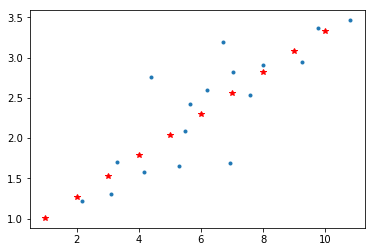

In [17]:
x = [1,2,3,4,5,6,7,8,9,10]
y = model.predict(x)
print(y)
plt.plot(X,Y,'.') # first plot
plt.plot(x,y,'r*') # second plot

# what are a and b in y = ax + b?

우리는 하나밖에 없음 layer가 1개 만들었으니까 당연한 것 - 그 이상 여러개를 만들면 그것이 딥러닝임

In [15]:
weight = model.layers[0].get_weights()
print(weight)

[array([[0.25869066]], dtype=float32), array([0.74877924], dtype=float32)]


값이 두개가 나오는 것이 보일텐데 첫번째가 a값 두번째가 y절편 값 (b) - b지만 상당히 b에 가깝다는 것을 알 수 있다. 

스파이더 웹 하나가 레이어다 여기서는 스파이더 웹이 1개 밖에 없으니 0을 써준것이고 그것밖에 없다 웹이 두개면 다르게 써야 될것 

만약 x의 값이 두개라면 ? x1 x2 면 ? 

화살표 개수가 3개 니까  a b c 라는 3개의 값을 찾아야 한다. 입력은 두개 밑의 상수 1은 정해져있으니까 출력은 y라고 하나로 정해놨으니까


출력값 입력값은 자유롭게 변화 시킬 수 있다 csv에 들어가서 셀 파일을 수정해서 말이다. 

가정 입력 3개 출력 2개 라면? 
추정해야 되는 parameter의 개수는 ? 내가 쓰는 데이터를 만들고 입력 구조와 출력 구조에 대한 생각. 입력 개수와 출력 개수를 통해 그림을 그리는 것
그것을 구현을 하는 것. 
